In [17]:
import numpy as np
import os
import pandas as pd
# import modin.pandas as pd

import matplotlib as mpl
mpl.use('agg')
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=20)
mpl.rc('xtick', labelsize=16)
mpl.rc('ytick', labelsize=16)

plt.rc('font',family='Times New Roman')
resolution=300
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(".\\box_plot\\" +fig_id + "_boxplot_97." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format = fig_extension, dpi = resolution)

In [15]:
%time df_all=pd.read_csv(r'C:\pz\jupyter notebook\hj\1W_superfamily_16S==97.csv')

Wall time: 2min 50s


In [7]:
df_all
# %time df_all=pd.read_csv('1W_superfamily_16S==97.csv')

,Unnamed: 0,Sample,EMPO1,EMPO3,total_cell_per_sample,cl00011,cl00012,cl00013,cl00014,cl00015,...,cl41769,cl41770,cl41771,cl41773,cl41775,cl41776,cl41778,cl41779,cl41780,cl41781
0,0,662.M3,Free-living,Surface (saline),1443.323571,0.006928,0.078358,1.857749,0.193535,3.255427,...,0.000000,0.093419,0.000000,0.000693,0.0,0.005543,0.000000,0.000000,0.000000,0.000000
1,97,1665.flipper.tag.40,Host-associated,Animal surface,4961.000000,0.000000,0.103003,1.918968,0.000202,4.006450,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,107,1578.O1.high0.36to0.41,Free-living,Soil (non-saline),1301.360076,0.003074,0.074693,1.726741,0.191593,4.210025,...,0.000000,0.113116,0.000000,0.000000,0.0,0.000000,0.017674,0.000768,0.000768,0.000000
3,276,933.N.1.2.H.E.3,Host-associated,Plant surface,1204.902273,0.000000,0.000963,1.951905,0.011619,3.797058,...,0.000000,0.039007,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,330,1235.sp0379,Free-living,Water (saline),1505.867805,0.000000,0.120342,1.978659,0.271770,4.194757,...,0.000000,0.015274,0.000000,0.000664,0.0,0.000000,0.000000,0.000000,0.000664,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1515361,2080.S48D85,Free-living,Water (saline),2145.824151,0.000000,0.016289,1.085496,0.017476,3.844910,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000466,0.000000
9996,1515427,722.TRRsed2.2.s.2.1.sequence,Free-living,Sediment (non-saline),2056.922274,0.003403,0.429101,2.406669,0.483449,4.146516,...,0.000000,0.005358,0.000486,0.000000,0.0,0.000000,0.004375,0.000000,0.001458,0.000000
9997,1515533,2382.SH005.C3.RH.1.654.leav.9.12.lane8.NoIndex...,Host-associated,Plant corpus,2511.186667,0.000000,0.000398,2.009077,0.000398,4.981393,...,0.000000,0.003982,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
9998,1515552,722.F11Tong.6.s.7.1.sequence,Host-associated,Animal secretion,3949.068701,0.000000,0.100331,1.383696,0.119480,2.467618,...,0.000000,0.000063,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
df_all_2

,EMPO3,cl00011,cl00012,cl00013,cl00014,cl00015,cl00016,cl00017,cl00018,cl00019,...,cl41769,cl41770,cl41771,cl41773,cl41775,cl41776,cl41778,cl41779,cl41780,cl41781
0,Aerosol (non-saline),0.815769,6.973172,138.156875,9.318247,268.102154,0.005810,0.000000,0.232628,52.611435,...,0.124420,2.945524,0.015311,0.080263,0.015796,0.153976,0.075915,0.036550,0.828818,0.030249
1,Animal corpus,0.167741,135.535437,516.110047,3.642318,1216.272032,0.000214,0.000000,0.106227,95.003048,...,0.094633,41.438003,0.000000,0.108204,0.000000,0.112844,0.007101,0.001714,0.482390,0.020686
2,Animal distal gut,29.293615,77.994632,1388.611813,152.106497,3226.599174,0.054786,0.000000,10.851871,641.865244,...,17.719491,47.511240,0.022599,3.103209,0.060215,1.396830,6.552049,1.031789,24.750260,0.080813
3,Animal proximal gut,5.954565,19.137216,520.517247,46.224369,1255.762075,0.081930,0.000000,2.694303,291.376989,...,0.193985,7.415917,0.000000,1.770174,0.010408,0.067442,1.285790,0.056487,7.050654,0.628793
4,Animal secretion,0.755428,74.804544,1276.043222,53.054985,2624.831011,0.002392,0.000000,4.791217,478.875865,...,0.613135,12.477099,0.037668,0.123989,0.011746,0.130059,0.121625,0.072680,11.450675,0.261968
5,Animal surface,9.875708,115.886711,1901.834136,97.894137,3396.656591,0.053576,0.001467,1.500368,544.570366,...,16.099581,49.884831,0.096544,0.598992,0.102659,0.465701,0.272656,0.243298,3.674383,0.084130
6,Hypersaline (saline),0.260260,0.949232,19.817631,2.148114,65.646547,0.000000,0.000000,1.379370,10.784046,...,0.672368,0.400643,0.000000,0.037094,0.000000,0.000000,4.122909,0.000000,0.183094,0.000000
7,Plant corpus,1.276447,1.366409,265.571509,3.009005,582.260711,0.000000,0.000000,0.003777,104.969652,...,0.230080,1.178292,0.003173,0.029945,0.000000,0.014730,0.048040,0.032462,0.352456,0.006895
8,Plant rhizosphere,7.945813,72.842282,1082.964822,157.418998,2244.395644,0.002084,0.000000,0.835320,397.292182,...,0.463476,66.699911,0.019585,2.008075,0.001708,1.767284,9.943006,0.692476,20.188499,0.372264
9,Plant surface,1.973202,60.178606,1705.022025,149.327456,4081.443314,0.320357,0.000000,0.209854,831.800325,...,0.388990,37.035165,0.051096,0.130855,0.000170,0.206771,0.067491,0.003794,0.413526,0.001612


In [6]:
df_all_2=pd.read_csv(r'C:\pz\jupyter notebook\hj\17_superfamily_16==97.csv')

In [20]:
color=['#E15ED0','#FEA762','#E15ED0','#FEA762','#FEA762','#E15ED0','#FEA762','#82BDD9','#82BDD9','#82BDD9','#E15ED0','#C0E0A1','#C0E0A1','#C0E0A1','#C0E0A1','#C0E0A1','#FEA762']
color2=color[::-1]
def box_plot(superfamily):
    grouped=df_all[superfamily].groupby(df_all['EMPO3'])
    labels=[]
    boxes=[]
    for i, j in grouped:
        labels.append(i)
        boxes.append(j)
        
    ig, ax = plt.subplots(figsize=(10, 12.5),clear=True) 
    bp=ax.boxplot(boxes, labels = labels,widths=0.5,vert=False,showmeans=True,sym='.',showfliers=False,
               flierprops = {'marker':'.','color':'black','markersize': 3.0},boxprops = {'color':'black'},
              medianprops = {'color':'red'},meanprops ={'color':'b','marker':'*','markersize': 6.0},patch_artist=True)
    [bp['boxes'][i].set(facecolor=color2[i]) for i in range(17)]
    ax.set_title(superfamily,fontsize=20)
    save_fig(superfamily)
    plt.close(ig)

In [22]:
def desc(superfamily):
    des_sup=df_all[superfamily].groupby(df_all['EMPO3']).describe()
    des_sup['median']=df_all[superfamily].groupby(df_all['EMPO3']).median()
    des_sup.to_csv(f'.\\description\\{superfamily}_description_97_.csv')
#     return(des_sup)

In [10]:
superfamily_list=df_all_2.columns[1:]
superfamily_list

Index(['cl00011', 'cl00012', 'cl00013', 'cl00014', 'cl00015', 'cl00016',
       'cl00017', 'cl00018', 'cl00019', 'cl00020',
       ...
       'cl41769', 'cl41770', 'cl41771', 'cl41773', 'cl41775', 'cl41776',
       'cl41778', 'cl41779', 'cl41780', 'cl41781'],
      dtype='object', length=19734)

Saving figure heatmap


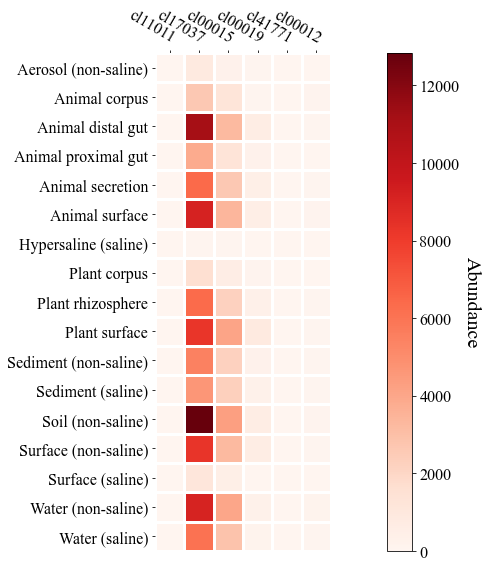

In [14]:
heat_map(superfamily_list)

In [ ]:
box_plot('cl35085')

In [21]:
for i in superfamily_list:
    box_plot(f'{i}')

Saving figure cl00011
Saving figure cl00012
Saving figure cl00013
Saving figure cl00014
Saving figure cl00015
Saving figure cl00016
Saving figure cl00017
Saving figure cl00018
Saving figure cl00019
Saving figure cl00020
Saving figure cl00021
Saving figure cl00022
Saving figure cl00025
Saving figure cl00030
Saving figure cl00031
Saving figure cl00032
Saving figure cl00033
Saving figure cl00034
Saving figure cl00035
Saving figure cl00038
Saving figure cl00040
Saving figure cl00042
Saving figure cl00046
Saving figure cl00047
Saving figure cl00049
Saving figure cl00051
Saving figure cl00054
Saving figure cl00055
Saving figure cl00056
Saving figure cl00057
Saving figure cl00060
Saving figure cl00061
Saving figure cl00062
Saving figure cl00064
Saving figure cl00068
Saving figure cl00069
Saving figure cl00071
Saving figure cl00072
Saving figure cl00073
Saving figure cl00075
Saving figure cl00081
Saving figure cl00082
Saving figure cl00083
Saving figure cl00084
Saving figure cl00085
Saving fig

Saving figure cl00604
Saving figure cl00605
Saving figure cl00606
Saving figure cl00607
Saving figure cl00608
Saving figure cl00610
Saving figure cl00611
Saving figure cl00612
Saving figure cl00613
Saving figure cl00614
Saving figure cl00615
Saving figure cl00616
Saving figure cl00617
Saving figure cl00618
Saving figure cl00620
Saving figure cl00622
Saving figure cl00625
Saving figure cl00627
Saving figure cl00628
Saving figure cl00630
Saving figure cl00632
Saving figure cl00635
Saving figure cl00638
Saving figure cl00640
Saving figure cl00641
Saving figure cl00642
Saving figure cl00644
Saving figure cl00647
Saving figure cl00649
Saving figure cl00650
Saving figure cl00652
Saving figure cl00653
Saving figure cl00654
Saving figure cl00656
Saving figure cl00659
Saving figure cl00660
Saving figure cl00661
Saving figure cl00662
Saving figure cl00663
Saving figure cl00666
Saving figure cl00667
Saving figure cl00668
Saving figure cl00669
Saving figure cl00670
Saving figure cl00671
Saving fig

Saving figure cl01261
Saving figure cl01262
Saving figure cl01264
Saving figure cl01267
Saving figure cl01275
Saving figure cl01279
Saving figure cl01280
Saving figure cl01281
Saving figure cl01282
Saving figure cl01284
Saving figure cl01285
Saving figure cl01287
Saving figure cl01288
Saving figure cl01294
Saving figure cl01298
Saving figure cl01299
Saving figure cl01301
Saving figure cl01304
Saving figure cl01308
Saving figure cl01311
Saving figure cl01312
Saving figure cl01314
Saving figure cl01315
Saving figure cl01317
Saving figure cl01318
Saving figure cl01319
Saving figure cl01321
Saving figure cl01327
Saving figure cl01328
Saving figure cl01329
Saving figure cl01330
Saving figure cl01332
Saving figure cl01339
Saving figure cl01341
Saving figure cl01342
Saving figure cl01346
Saving figure cl01349
Saving figure cl01350
Saving figure cl01351
Saving figure cl01356
Saving figure cl01359
Saving figure cl01360
Saving figure cl01365
Saving figure cl01368
Saving figure cl01369
Saving fig

Saving figure cl02015
Saving figure cl02016
Saving figure cl02017
Saving figure cl02019
Saving figure cl02022
Saving figure cl02025
Saving figure cl02032
Saving figure cl02034
Saving figure cl02035
Saving figure cl02036
Saving figure cl02037
Saving figure cl02038
Saving figure cl02039
Saving figure cl02041
Saving figure cl02042
Saving figure cl02043
Saving figure cl02044
Saving figure cl02047
Saving figure cl02048
Saving figure cl02049
Saving figure cl02050
Saving figure cl02055
Saving figure cl02056
Saving figure cl02059
Saving figure cl02063
Saving figure cl02066
Saving figure cl02069
Saving figure cl02071
Saving figure cl02073
Saving figure cl02074
Saving figure cl02079
Saving figure cl02086
Saving figure cl02087
Saving figure cl02088
Saving figure cl02089
Saving figure cl02091
Saving figure cl02092
Saving figure cl02093
Saving figure cl02095
Saving figure cl02096
Saving figure cl02098
Saving figure cl02099
Saving figure cl02102
Saving figure cl02104
Saving figure cl02106
Saving fig

Saving figure cl03055
Saving figure cl03056
Saving figure cl03058
Saving figure cl03065
Saving figure cl03069
Saving figure cl03073
Saving figure cl03074
Saving figure cl03075
Saving figure cl03084
Saving figure cl03088
Saving figure cl03089
Saving figure cl03090
Saving figure cl03092
Saving figure cl03093
Saving figure cl03098
Saving figure cl03099
Saving figure cl03104
Saving figure cl03107
Saving figure cl03113
Saving figure cl03114
Saving figure cl03119
Saving figure cl03120
Saving figure cl03127
Saving figure cl03128
Saving figure cl03129
Saving figure cl03130
Saving figure cl03131
Saving figure cl03136
Saving figure cl03140
Saving figure cl03141
Saving figure cl03142
Saving figure cl03145
Saving figure cl03150
Saving figure cl03152
Saving figure cl03157
Saving figure cl03158
Saving figure cl03164
Saving figure cl03165
Saving figure cl03169
Saving figure cl03170
Saving figure cl03174
Saving figure cl03177
Saving figure cl03179
Saving figure cl03181
Saving figure cl03188
Saving fig

Saving figure cl04622
Saving figure cl04627
Saving figure cl04628
Saving figure cl04629
Saving figure cl04640
Saving figure cl04648
Saving figure cl04653
Saving figure cl04657
Saving figure cl04658
Saving figure cl04659
Saving figure cl04660
Saving figure cl04661
Saving figure cl04664
Saving figure cl04666
Saving figure cl04673
Saving figure cl04677
Saving figure cl04678
Saving figure cl04679
Saving figure cl04685
Saving figure cl04692
Saving figure cl04705
Saving figure cl04706
Saving figure cl04707
Saving figure cl04711
Saving figure cl04714
Saving figure cl04720
Saving figure cl04723
Saving figure cl04725
Saving figure cl04730
Saving figure cl04732
Saving figure cl04734
Saving figure cl04741
Saving figure cl04742
Saving figure cl04748
Saving figure cl04756
Saving figure cl04760
Saving figure cl04765
Saving figure cl04768
Saving figure cl04773
Saving figure cl04774
Saving figure cl04780
Saving figure cl04783
Saving figure cl04784
Saving figure cl04786
Saving figure cl04791
Saving fig

Saving figure cl05950
Saving figure cl05951
Saving figure cl05952
Saving figure cl05959
Saving figure cl05960
Saving figure cl05964
Saving figure cl05968
Saving figure cl05973
Saving figure cl05980
Saving figure cl05986
Saving figure cl05987
Saving figure cl05992
Saving figure cl05994
Saving figure cl05996
Saving figure cl06002
Saving figure cl06006
Saving figure cl06009
Saving figure cl06013
Saving figure cl06016
Saving figure cl06019
Saving figure cl06020
Saving figure cl06028
Saving figure cl06039
Saving figure cl06042
Saving figure cl06044
Saving figure cl06047
Saving figure cl06054
Saving figure cl06055
Saving figure cl06056
Saving figure cl06057
Saving figure cl06059
Saving figure cl06062
Saving figure cl06066
Saving figure cl06067
Saving figure cl06068
Saving figure cl06070
Saving figure cl06075
Saving figure cl06076
Saving figure cl06079
Saving figure cl06082
Saving figure cl06086
Saving figure cl06088
Saving figure cl06089
Saving figure cl06099
Saving figure cl06100
Saving fig

Saving figure cl07128
Saving figure cl07135
Saving figure cl07144
Saving figure cl07155
Saving figure cl07159
Saving figure cl07164
Saving figure cl07172
Saving figure cl07173
Saving figure cl07178
Saving figure cl07196
Saving figure cl07197
Saving figure cl07203
Saving figure cl07224
Saving figure cl07226
Saving figure cl07230
Saving figure cl07232
Saving figure cl07233
Saving figure cl07235
Saving figure cl07240
Saving figure cl07247
Saving figure cl07248
Saving figure cl07251
Saving figure cl07253
Saving figure cl07257
Saving figure cl07260
Saving figure cl07270
Saving figure cl07283
Saving figure cl07287
Saving figure cl07291
Saving figure cl07293
Saving figure cl07296
Saving figure cl07310
Saving figure cl07311
Saving figure cl07316
Saving figure cl07318
Saving figure cl07323
Saving figure cl07325
Saving figure cl07329
Saving figure cl07330
Saving figure cl07332
Saving figure cl07333
Saving figure cl07336
Saving figure cl07339
Saving figure cl07341
Saving figure cl07343
Saving fig

Saving figure cl08405
Saving figure cl08409
Saving figure cl08410
Saving figure cl08416
Saving figure cl08418
Saving figure cl08420
Saving figure cl08424
Saving figure cl08425
Saving figure cl08426
Saving figure cl08436
Saving figure cl08444
Saving figure cl08445
Saving figure cl08447
Saving figure cl08448
Saving figure cl08451
Saving figure cl08457
Saving figure cl08459
Saving figure cl08465
Saving figure cl08467
Saving figure cl08468
Saving figure cl08470
Saving figure cl08472
Saving figure cl08475
Saving figure cl08476
Saving figure cl08486
Saving figure cl08488
Saving figure cl08489
Saving figure cl08491
Saving figure cl08493
Saving figure cl08497
Saving figure cl08498
Saving figure cl08500
Saving figure cl08501
Saving figure cl08504
Saving figure cl08505
Saving figure cl08506
Saving figure cl08508
Saving figure cl08509
Saving figure cl08510
Saving figure cl08511
Saving figure cl08512
Saving figure cl08517
Saving figure cl08520
Saving figure cl08521
Saving figure cl08522
Saving fig

Saving figure cl10351
Saving figure cl10354
Saving figure cl10355
Saving figure cl10356
Saving figure cl10357
Saving figure cl10361
Saving figure cl10363
Saving figure cl10365
Saving figure cl10368
Saving figure cl10373
Saving figure cl10374
Saving figure cl10375
Saving figure cl10383
Saving figure cl10385
Saving figure cl10390
Saving figure cl10393
Saving figure cl10394
Saving figure cl10395
Saving figure cl10397
Saving figure cl10401
Saving figure cl10403
Saving figure cl10408
Saving figure cl10410
Saving figure cl10413
Saving figure cl10415
Saving figure cl10418
Saving figure cl10419
Saving figure cl10421
Saving figure cl10424
Saving figure cl10426
Saving figure cl10428
Saving figure cl10429
Saving figure cl10430
Saving figure cl10431
Saving figure cl10432
Saving figure cl10434
Saving figure cl10435
Saving figure cl10436
Saving figure cl10437
Saving figure cl10447
Saving figure cl10448
Saving figure cl10459
Saving figure cl10465
Saving figure cl10468
Saving figure cl10470
Saving fig

Saving figure cl11552
Saving figure cl11555
Saving figure cl11560
Saving figure cl11562
Saving figure cl11564
Saving figure cl11568
Saving figure cl11569
Saving figure cl11570
Saving figure cl11571
Saving figure cl11574
Saving figure cl11576
Saving figure cl11577
Saving figure cl11580
Saving figure cl11584
Saving figure cl11585
Saving figure cl11589
Saving figure cl11592
Saving figure cl11594
Saving figure cl11600
Saving figure cl11602
Saving figure cl11603
Saving figure cl11610
Saving figure cl11612
Saving figure cl11614
Saving figure cl11619
Saving figure cl11622
Saving figure cl11625
Saving figure cl11627
Saving figure cl11629
Saving figure cl11630
Saving figure cl11632
Saving figure cl11636
Saving figure cl11637
Saving figure cl11643
Saving figure cl11645
Saving figure cl11647
Saving figure cl11648
Saving figure cl11652
Saving figure cl11653
Saving figure cl11654
Saving figure cl11655
Saving figure cl11656
Saving figure cl11657
Saving figure cl11672
Saving figure cl11677
Saving fig

Saving figure cl12589
Saving figure cl12590
Saving figure cl12592
Saving figure cl12594
Saving figure cl12600
Saving figure cl12601
Saving figure cl12603
Saving figure cl12605
Saving figure cl12607
Saving figure cl12609
Saving figure cl12610
Saving figure cl12611
Saving figure cl12614
Saving figure cl12621
Saving figure cl12623
Saving figure cl12624
Saving figure cl12625
Saving figure cl12626
Saving figure cl12627
Saving figure cl12628
Saving figure cl12629
Saving figure cl12630
Saving figure cl12632
Saving figure cl12633
Saving figure cl12636
Saving figure cl12637
Saving figure cl12640
Saving figure cl12641
Saving figure cl12642
Saving figure cl12643
Saving figure cl12644
Saving figure cl12645
Saving figure cl12646
Saving figure cl12647
Saving figure cl12650
Saving figure cl12657
Saving figure cl12659
Saving figure cl12660
Saving figure cl12666
Saving figure cl12667
Saving figure cl12669
Saving figure cl12670
Saving figure cl12671
Saving figure cl12672
Saving figure cl12673
Saving fig

Saving figure cl13208
Saving figure cl13209
Saving figure cl13213
Saving figure cl13215
Saving figure cl13218
Saving figure cl13222
Saving figure cl13223
Saving figure cl13224
Saving figure cl13226
Saving figure cl13227
Saving figure cl13228
Saving figure cl13229
Saving figure cl13230
Saving figure cl13231
Saving figure cl13232
Saving figure cl13234
Saving figure cl13235
Saving figure cl13236
Saving figure cl13237
Saving figure cl13239
Saving figure cl13241
Saving figure cl13245
Saving figure cl13246
Saving figure cl13247
Saving figure cl13252
Saving figure cl13253
Saving figure cl13254
Saving figure cl13255
Saving figure cl13258
Saving figure cl13259
Saving figure cl13260
Saving figure cl13262
Saving figure cl13266
Saving figure cl13271
Saving figure cl13274
Saving figure cl13277
Saving figure cl13278
Saving figure cl13279
Saving figure cl13280
Saving figure cl13281
Saving figure cl13284
Saving figure cl13286
Saving figure cl13289
Saving figure cl13290
Saving figure cl13292
Saving fig

Saving figure cl14386
Saving figure cl14387
Saving figure cl14388
Saving figure cl14389
Saving figure cl14404
Saving figure cl14405
Saving figure cl14406
Saving figure cl14412
Saving figure cl14421
Saving figure cl14424
Saving figure cl14426
Saving figure cl14440
Saving figure cl14443
Saving figure cl14447
Saving figure cl14449
Saving figure cl14454
Saving figure cl14455
Saving figure cl14456
Saving figure cl14457
Saving figure cl14459
Saving figure cl14466
Saving figure cl14471
Saving figure cl14481
Saving figure cl14489
Saving figure cl14494
Saving figure cl14497
Saving figure cl14499
Saving figure cl14502
Saving figure cl14512
Saving figure cl14538
Saving figure cl14543
Saving figure cl14544
Saving figure cl14547
Saving figure cl14548
Saving figure cl14550
Saving figure cl14551
Saving figure cl14556
Saving figure cl14561
Saving figure cl14563
Saving figure cl14569
Saving figure cl14571
Saving figure cl14575
Saving figure cl14578
Saving figure cl14580
Saving figure cl14583
Saving fig

Saving figure cl15732
Saving figure cl15733
Saving figure cl15736
Saving figure cl15737
Saving figure cl15738
Saving figure cl15739
Saving figure cl15740
Saving figure cl15741
Saving figure cl15742
Saving figure cl15743
Saving figure cl15744
Saving figure cl15745
Saving figure cl15746
Saving figure cl15749
Saving figure cl15751
Saving figure cl15753
Saving figure cl15755
Saving figure cl15758
Saving figure cl15774
Saving figure cl15781
Saving figure cl15787
Saving figure cl15796
Saving figure cl15806
Saving figure cl15810
Saving figure cl15816
Saving figure cl15819
Saving figure cl15824
Saving figure cl15825
Saving figure cl15827
Saving figure cl15828
Saving figure cl15830
Saving figure cl15834
Saving figure cl15838
Saving figure cl15839
Saving figure cl15840
Saving figure cl15841
Saving figure cl15846
Saving figure cl15848
Saving figure cl15851
Saving figure cl15855
Saving figure cl15870
Saving figure cl15872
Saving figure cl15893
Saving figure cl15918
Saving figure cl15935
Saving fig

Saving figure cl16507
Saving figure cl16509
Saving figure cl16511
Saving figure cl16512
Saving figure cl16513
Saving figure cl16514
Saving figure cl16515
Saving figure cl16518
Saving figure cl16519
Saving figure cl16520
Saving figure cl16521
Saving figure cl16522
Saving figure cl16523
Saving figure cl16524
Saving figure cl16525
Saving figure cl16526
Saving figure cl16527
Saving figure cl16528
Saving figure cl16529
Saving figure cl16530
Saving figure cl16531
Saving figure cl16532
Saving figure cl16534
Saving figure cl16535
Saving figure cl16536
Saving figure cl16537
Saving figure cl16538
Saving figure cl16539
Saving figure cl16540
Saving figure cl16541
Saving figure cl16542
Saving figure cl16543
Saving figure cl16544
Saving figure cl16545
Saving figure cl16546
Saving figure cl16547
Saving figure cl16548
Saving figure cl16549
Saving figure cl16550
Saving figure cl16551
Saving figure cl16552
Saving figure cl16553
Saving figure cl16554
Saving figure cl16555
Saving figure cl16556
Saving fig

Saving figure cl17045
Saving figure cl17048
Saving figure cl17055
Saving figure cl17065
Saving figure cl17067
Saving figure cl17068
Saving figure cl17069
Saving figure cl17070
Saving figure cl17077
Saving figure cl17083
Saving figure cl17090
Saving figure cl17091
Saving figure cl17094
Saving figure cl17095
Saving figure cl17096
Saving figure cl17099
Saving figure cl17100
Saving figure cl17109
Saving figure cl17110
Saving figure cl17112
Saving figure cl17113
Saving figure cl17126
Saving figure cl17128
Saving figure cl17130
Saving figure cl17133
Saving figure cl17136
Saving figure cl17137
Saving figure cl17138
Saving figure cl17141
Saving figure cl17143
Saving figure cl17145
Saving figure cl17146
Saving figure cl17147
Saving figure cl17148
Saving figure cl17149
Saving figure cl17150
Saving figure cl17151
Saving figure cl17152
Saving figure cl17153
Saving figure cl17154
Saving figure cl17156
Saving figure cl17160
Saving figure cl17163
Saving figure cl17165
Saving figure cl17166
Saving fig

Saving figure cl19864
Saving figure cl19866
Saving figure cl19867
Saving figure cl19868
Saving figure cl19870
Saving figure cl19871
Saving figure cl19872
Saving figure cl19873
Saving figure cl19874
Saving figure cl19875
Saving figure cl19876
Saving figure cl19878
Saving figure cl19879
Saving figure cl19880
Saving figure cl19881
Saving figure cl19883
Saving figure cl19885
Saving figure cl19886
Saving figure cl19887
Saving figure cl19888
Saving figure cl19890
Saving figure cl19894
Saving figure cl19895
Saving figure cl19897
Saving figure cl19898
Saving figure cl19902
Saving figure cl19905
Saving figure cl19906
Saving figure cl19907
Saving figure cl19908
Saving figure cl19911
Saving figure cl19912
Saving figure cl19913
Saving figure cl19916
Saving figure cl19922
Saving figure cl19929
Saving figure cl19932
Saving figure cl19935
Saving figure cl19936
Saving figure cl19950
Saving figure cl19952
Saving figure cl19981
Saving figure cl19983
Saving figure cl19988
Saving figure cl19991
Saving fig

Saving figure cl20814
Saving figure cl20816
Saving figure cl20817
Saving figure cl20819
Saving figure cl20823
Saving figure cl20833
Saving figure cl20837
Saving figure cl20847
Saving figure cl20854
Saving figure cl20868
Saving figure cl20880
Saving figure cl20937
Saving figure cl20941
Saving figure cl20958
Saving figure cl20972
Saving figure cl21003
Saving figure cl21004
Saving figure cl21006
Saving figure cl21017
Saving figure cl21031
Saving figure cl21034
Saving figure cl21041
Saving figure cl21053
Saving figure cl21074
Saving figure cl21092
Saving figure cl21098
Saving figure cl21125
Saving figure cl21132
Saving figure cl21136
Saving figure cl21138
Saving figure cl21150
Saving figure cl21160
Saving figure cl21161
Saving figure cl21168
Saving figure cl21188
Saving figure cl21198
Saving figure cl21200
Saving figure cl21203
Saving figure cl21207
Saving figure cl21221
Saving figure cl21224
Saving figure cl21236
Saving figure cl21237
Saving figure cl21241
Saving figure cl21242
Saving fig

Saving figure cl22532
Saving figure cl22542
Saving figure cl22544
Saving figure cl22548
Saving figure cl22550
Saving figure cl22557
Saving figure cl22571
Saving figure cl22626
Saving figure cl22628
Saving figure cl22636
Saving figure cl22655
Saving figure cl22678
Saving figure cl22681
Saving figure cl22684
Saving figure cl22701
Saving figure cl22733
Saving figure cl22759
Saving figure cl22764
Saving figure cl22765
Saving figure cl22766
Saving figure cl22768
Saving figure cl22771
Saving figure cl22781
Saving figure cl22782
Saving figure cl22783
Saving figure cl22784
Saving figure cl22785
Saving figure cl22786
Saving figure cl22787
Saving figure cl22788
Saving figure cl22791
Saving figure cl22792
Saving figure cl22793
Saving figure cl22794
Saving figure cl22795
Saving figure cl22796
Saving figure cl22798
Saving figure cl22799
Saving figure cl22800
Saving figure cl22801
Saving figure cl22802
Saving figure cl22803
Saving figure cl22804
Saving figure cl22805
Saving figure cl22806
Saving fig

Saving figure cl23921
Saving figure cl23922
Saving figure cl23924
Saving figure cl23925
Saving figure cl23926
Saving figure cl23927
Saving figure cl23928
Saving figure cl23929
Saving figure cl23930
Saving figure cl23931
Saving figure cl23932
Saving figure cl23933
Saving figure cl23934
Saving figure cl23935
Saving figure cl23936
Saving figure cl23937
Saving figure cl23938
Saving figure cl23939
Saving figure cl23940
Saving figure cl23941
Saving figure cl23942
Saving figure cl23945
Saving figure cl23946
Saving figure cl23947
Saving figure cl23948
Saving figure cl23949
Saving figure cl23950
Saving figure cl23951
Saving figure cl23953
Saving figure cl23954
Saving figure cl23955
Saving figure cl23956
Saving figure cl23957
Saving figure cl23958
Saving figure cl23959
Saving figure cl23960
Saving figure cl23961
Saving figure cl23962
Saving figure cl23964
Saving figure cl23965
Saving figure cl23966
Saving figure cl23967
Saving figure cl23968
Saving figure cl23969
Saving figure cl23970
Saving fig

Saving figure cl24771
Saving figure cl24772
Saving figure cl24773
Saving figure cl24774
Saving figure cl24775
Saving figure cl24776
Saving figure cl24777
Saving figure cl24778
Saving figure cl24781
Saving figure cl24782
Saving figure cl24784
Saving figure cl24787
Saving figure cl24791
Saving figure cl24792
Saving figure cl24793
Saving figure cl24794
Saving figure cl24795
Saving figure cl24797
Saving figure cl24799
Saving figure cl24801
Saving figure cl24802
Saving figure cl24803
Saving figure cl24804
Saving figure cl24805
Saving figure cl24806
Saving figure cl24807
Saving figure cl24810
Saving figure cl24816
Saving figure cl24817
Saving figure cl24818
Saving figure cl24821
Saving figure cl24822
Saving figure cl24823
Saving figure cl24824
Saving figure cl24826
Saving figure cl24827
Saving figure cl24829
Saving figure cl24830
Saving figure cl24832
Saving figure cl24833
Saving figure cl24834
Saving figure cl24835
Saving figure cl24837
Saving figure cl24838
Saving figure cl24839
Saving fig

Saving figure cl25584
Saving figure cl25590
Saving figure cl25592
Saving figure cl25594
Saving figure cl25595
Saving figure cl25596
Saving figure cl25597
Saving figure cl25600
Saving figure cl25603
Saving figure cl25607
Saving figure cl25608
Saving figure cl25612
Saving figure cl25614
Saving figure cl25616
Saving figure cl25618
Saving figure cl25622
Saving figure cl25624
Saving figure cl25625
Saving figure cl25628
Saving figure cl25629
Saving figure cl25630
Saving figure cl25631
Saving figure cl25634
Saving figure cl25640
Saving figure cl25641
Saving figure cl25643
Saving figure cl25644
Saving figure cl25646
Saving figure cl25648
Saving figure cl25649
Saving figure cl25652
Saving figure cl25653
Saving figure cl25655
Saving figure cl25656
Saving figure cl25664
Saving figure cl25669
Saving figure cl25673
Saving figure cl25675
Saving figure cl25679
Saving figure cl25680
Saving figure cl25682
Saving figure cl25683
Saving figure cl25686
Saving figure cl25688
Saving figure cl25689
Saving fig

Saving figure cl26561
Saving figure cl26564
Saving figure cl26565
Saving figure cl26566
Saving figure cl26569
Saving figure cl26571
Saving figure cl26572
Saving figure cl26573
Saving figure cl26576
Saving figure cl26577
Saving figure cl26580
Saving figure cl26582
Saving figure cl26583
Saving figure cl26584
Saving figure cl26586
Saving figure cl26587
Saving figure cl26588
Saving figure cl26589
Saving figure cl26591
Saving figure cl26592
Saving figure cl26593
Saving figure cl26595
Saving figure cl26596
Saving figure cl26597
Saving figure cl26599
Saving figure cl26606
Saving figure cl26609
Saving figure cl26612
Saving figure cl26613
Saving figure cl26615
Saving figure cl26616
Saving figure cl26617
Saving figure cl26619
Saving figure cl26620
Saving figure cl26621
Saving figure cl26622
Saving figure cl26623
Saving figure cl26624
Saving figure cl26629
Saving figure cl26630
Saving figure cl26631
Saving figure cl26633
Saving figure cl26638
Saving figure cl26645
Saving figure cl26647
Saving fig

Saving figure cl27781
Saving figure cl27782
Saving figure cl27783
Saving figure cl27786
Saving figure cl27787
Saving figure cl27788
Saving figure cl27789
Saving figure cl27792
Saving figure cl27794
Saving figure cl27795
Saving figure cl27796
Saving figure cl27798
Saving figure cl27801
Saving figure cl27802
Saving figure cl27806
Saving figure cl27807
Saving figure cl27808
Saving figure cl27809
Saving figure cl27810
Saving figure cl27811
Saving figure cl27812
Saving figure cl27821
Saving figure cl27824
Saving figure cl27825
Saving figure cl27828
Saving figure cl27829
Saving figure cl27830
Saving figure cl27833
Saving figure cl27834
Saving figure cl27835
Saving figure cl27836
Saving figure cl27839
Saving figure cl27840
Saving figure cl27842
Saving figure cl27843
Saving figure cl27844
Saving figure cl27848
Saving figure cl27849
Saving figure cl27850
Saving figure cl27853
Saving figure cl27854
Saving figure cl27855
Saving figure cl27856
Saving figure cl27860
Saving figure cl27861
Saving fig

Saving figure cl28712
Saving figure cl28713
Saving figure cl28714
Saving figure cl28715
Saving figure cl28716
Saving figure cl28718
Saving figure cl28719
Saving figure cl28720
Saving figure cl28721
Saving figure cl28722
Saving figure cl28723
Saving figure cl28724
Saving figure cl28725
Saving figure cl28726
Saving figure cl28727
Saving figure cl28728
Saving figure cl28729
Saving figure cl28730
Saving figure cl28732
Saving figure cl28733
Saving figure cl28734
Saving figure cl28736
Saving figure cl28737
Saving figure cl28738
Saving figure cl28740
Saving figure cl28741
Saving figure cl28742
Saving figure cl28743
Saving figure cl28747
Saving figure cl28749
Saving figure cl28750
Saving figure cl28752
Saving figure cl28758
Saving figure cl28760
Saving figure cl28761
Saving figure cl28766
Saving figure cl28767
Saving figure cl28768
Saving figure cl28772
Saving figure cl28773
Saving figure cl28775
Saving figure cl28776
Saving figure cl28779
Saving figure cl28780
Saving figure cl28783
Saving fig

Saving figure cl29256
Saving figure cl29257
Saving figure cl29258
Saving figure cl29259
Saving figure cl29260
Saving figure cl29261
Saving figure cl29262
Saving figure cl29264
Saving figure cl29265
Saving figure cl29266
Saving figure cl29267
Saving figure cl29268
Saving figure cl29269
Saving figure cl29270
Saving figure cl29271
Saving figure cl29272
Saving figure cl29273
Saving figure cl29274
Saving figure cl29275
Saving figure cl29276
Saving figure cl29277
Saving figure cl29278
Saving figure cl29279
Saving figure cl29280
Saving figure cl29281
Saving figure cl29282
Saving figure cl29283
Saving figure cl29284
Saving figure cl29285
Saving figure cl29287
Saving figure cl29288
Saving figure cl29290
Saving figure cl29291
Saving figure cl29292
Saving figure cl29293
Saving figure cl29294
Saving figure cl29296
Saving figure cl29297
Saving figure cl29298
Saving figure cl29299
Saving figure cl29300
Saving figure cl29302
Saving figure cl29303
Saving figure cl29305
Saving figure cl29306
Saving fig

Saving figure cl29782
Saving figure cl29783
Saving figure cl29785
Saving figure cl29786
Saving figure cl29787
Saving figure cl29788
Saving figure cl29790
Saving figure cl29791
Saving figure cl29792
Saving figure cl29793
Saving figure cl29794
Saving figure cl29795
Saving figure cl29797
Saving figure cl29798
Saving figure cl29799
Saving figure cl29800
Saving figure cl29801
Saving figure cl29807
Saving figure cl29808
Saving figure cl29809
Saving figure cl29810
Saving figure cl29811
Saving figure cl29813
Saving figure cl29815
Saving figure cl29816
Saving figure cl29817
Saving figure cl29818
Saving figure cl29819
Saving figure cl29820
Saving figure cl29821
Saving figure cl29822
Saving figure cl29823
Saving figure cl29824
Saving figure cl29825
Saving figure cl29826
Saving figure cl29827
Saving figure cl29828
Saving figure cl29830
Saving figure cl29831
Saving figure cl29833
Saving figure cl29834
Saving figure cl29835
Saving figure cl29836
Saving figure cl29838
Saving figure cl29840
Saving fig

Saving figure cl30255
Saving figure cl30256
Saving figure cl30257
Saving figure cl30258
Saving figure cl30259
Saving figure cl30260
Saving figure cl30261
Saving figure cl30262
Saving figure cl30263
Saving figure cl30266
Saving figure cl30267
Saving figure cl30268
Saving figure cl30269
Saving figure cl30270
Saving figure cl30271
Saving figure cl30272
Saving figure cl30273
Saving figure cl30274
Saving figure cl30275
Saving figure cl30276
Saving figure cl30278
Saving figure cl30279
Saving figure cl30280
Saving figure cl30281
Saving figure cl30282
Saving figure cl30283
Saving figure cl30285
Saving figure cl30286
Saving figure cl30287
Saving figure cl30288
Saving figure cl30289
Saving figure cl30290
Saving figure cl30291
Saving figure cl30292
Saving figure cl30293
Saving figure cl30294
Saving figure cl30295
Saving figure cl30296
Saving figure cl30297
Saving figure cl30300
Saving figure cl30301
Saving figure cl30302
Saving figure cl30303
Saving figure cl30304
Saving figure cl30305
Saving fig

Saving figure cl30703
Saving figure cl30704
Saving figure cl30706
Saving figure cl30707
Saving figure cl30710
Saving figure cl30711
Saving figure cl30712
Saving figure cl30713
Saving figure cl30714
Saving figure cl30715
Saving figure cl30716
Saving figure cl30717
Saving figure cl30719
Saving figure cl30720
Saving figure cl30721
Saving figure cl30722
Saving figure cl30723
Saving figure cl30724
Saving figure cl30725
Saving figure cl30726
Saving figure cl30727
Saving figure cl30728
Saving figure cl30729
Saving figure cl30731
Saving figure cl30732
Saving figure cl30733
Saving figure cl30734
Saving figure cl30735
Saving figure cl30736
Saving figure cl30737
Saving figure cl30738
Saving figure cl30740
Saving figure cl30742
Saving figure cl30743
Saving figure cl30744
Saving figure cl30745
Saving figure cl30746
Saving figure cl30747
Saving figure cl30748
Saving figure cl30749
Saving figure cl30752
Saving figure cl30753
Saving figure cl30754
Saving figure cl30755
Saving figure cl30756
Saving fig

Saving figure cl31209
Saving figure cl31210
Saving figure cl31212
Saving figure cl31213
Saving figure cl31214
Saving figure cl31216
Saving figure cl31217
Saving figure cl31218
Saving figure cl31220
Saving figure cl31221
Saving figure cl31222
Saving figure cl31223
Saving figure cl31224
Saving figure cl31225
Saving figure cl31226
Saving figure cl31227
Saving figure cl31228
Saving figure cl31229
Saving figure cl31230
Saving figure cl31231
Saving figure cl31233
Saving figure cl31234
Saving figure cl31235
Saving figure cl31236
Saving figure cl31237
Saving figure cl31238
Saving figure cl31239
Saving figure cl31240
Saving figure cl31241
Saving figure cl31242
Saving figure cl31243
Saving figure cl31244
Saving figure cl31245
Saving figure cl31246
Saving figure cl31249
Saving figure cl31250
Saving figure cl31252
Saving figure cl31253
Saving figure cl31254
Saving figure cl31255
Saving figure cl31257
Saving figure cl31258
Saving figure cl31259
Saving figure cl31260
Saving figure cl31261
Saving fig

Saving figure cl31645
Saving figure cl31646
Saving figure cl31647
Saving figure cl31648
Saving figure cl31649
Saving figure cl31650
Saving figure cl31651
Saving figure cl31652
Saving figure cl31653
Saving figure cl31654
Saving figure cl31655
Saving figure cl31656
Saving figure cl31657
Saving figure cl31658
Saving figure cl31659
Saving figure cl31660
Saving figure cl31661
Saving figure cl31662
Saving figure cl31663
Saving figure cl31664
Saving figure cl31665
Saving figure cl31666
Saving figure cl31667
Saving figure cl31668
Saving figure cl31669
Saving figure cl31670
Saving figure cl31671
Saving figure cl31672
Saving figure cl31673
Saving figure cl31674
Saving figure cl31675
Saving figure cl31676
Saving figure cl31677
Saving figure cl31678
Saving figure cl31679
Saving figure cl31680
Saving figure cl31681
Saving figure cl31682
Saving figure cl31683
Saving figure cl31684
Saving figure cl31685
Saving figure cl31686
Saving figure cl31687
Saving figure cl31688
Saving figure cl31689
Saving fig

Saving figure cl32068
Saving figure cl32069
Saving figure cl32070
Saving figure cl32071
Saving figure cl32072
Saving figure cl32073
Saving figure cl32074
Saving figure cl32075
Saving figure cl32077
Saving figure cl32078
Saving figure cl32079
Saving figure cl32080
Saving figure cl32081
Saving figure cl32082
Saving figure cl32083
Saving figure cl32084
Saving figure cl32085
Saving figure cl32086
Saving figure cl32087
Saving figure cl32088
Saving figure cl32089
Saving figure cl32090
Saving figure cl32091
Saving figure cl32092
Saving figure cl32093
Saving figure cl32094
Saving figure cl32095
Saving figure cl32096
Saving figure cl32097
Saving figure cl32098
Saving figure cl32099
Saving figure cl32100
Saving figure cl32101
Saving figure cl32102
Saving figure cl32104
Saving figure cl32105
Saving figure cl32106
Saving figure cl32107
Saving figure cl32108
Saving figure cl32109
Saving figure cl32112
Saving figure cl32113
Saving figure cl32114
Saving figure cl32115
Saving figure cl32117
Saving fig

Saving figure cl32472
Saving figure cl32473
Saving figure cl32474
Saving figure cl32475
Saving figure cl32476
Saving figure cl32477
Saving figure cl32478
Saving figure cl32479
Saving figure cl32480
Saving figure cl32481
Saving figure cl32482
Saving figure cl32483
Saving figure cl32484
Saving figure cl32485
Saving figure cl32486
Saving figure cl32487
Saving figure cl32488
Saving figure cl32489
Saving figure cl32490
Saving figure cl32491
Saving figure cl32492
Saving figure cl32493
Saving figure cl32494
Saving figure cl32496
Saving figure cl32497
Saving figure cl32498
Saving figure cl32500
Saving figure cl32501
Saving figure cl32502
Saving figure cl32503
Saving figure cl32504
Saving figure cl32505
Saving figure cl32506
Saving figure cl32507
Saving figure cl32508
Saving figure cl32509
Saving figure cl32510
Saving figure cl32511
Saving figure cl32512
Saving figure cl32513
Saving figure cl32514
Saving figure cl32515
Saving figure cl32516
Saving figure cl32517
Saving figure cl32518
Saving fig

Saving figure cl32858
Saving figure cl32859
Saving figure cl32860
Saving figure cl32861
Saving figure cl32862
Saving figure cl32863
Saving figure cl32864
Saving figure cl32865
Saving figure cl32866
Saving figure cl32867
Saving figure cl32868
Saving figure cl32869
Saving figure cl32870
Saving figure cl32871
Saving figure cl32872
Saving figure cl32873
Saving figure cl32874
Saving figure cl32875
Saving figure cl32876
Saving figure cl32877
Saving figure cl32878
Saving figure cl32879
Saving figure cl32880
Saving figure cl32881
Saving figure cl32882
Saving figure cl32883
Saving figure cl32884
Saving figure cl32885
Saving figure cl32886
Saving figure cl32887
Saving figure cl32888
Saving figure cl32889
Saving figure cl32890
Saving figure cl32891
Saving figure cl32892
Saving figure cl32893
Saving figure cl32894
Saving figure cl32895
Saving figure cl32896
Saving figure cl32897
Saving figure cl32898
Saving figure cl32899
Saving figure cl32900
Saving figure cl32901
Saving figure cl32902
Saving fig

Saving figure cl33249
Saving figure cl33250
Saving figure cl33252
Saving figure cl33256
Saving figure cl33257
Saving figure cl33258
Saving figure cl33260
Saving figure cl33261
Saving figure cl33262
Saving figure cl33263
Saving figure cl33264
Saving figure cl33265
Saving figure cl33266
Saving figure cl33267
Saving figure cl33268
Saving figure cl33269
Saving figure cl33271
Saving figure cl33272
Saving figure cl33273
Saving figure cl33274
Saving figure cl33275
Saving figure cl33276
Saving figure cl33277
Saving figure cl33278
Saving figure cl33279
Saving figure cl33280
Saving figure cl33281
Saving figure cl33282
Saving figure cl33283
Saving figure cl33284
Saving figure cl33285
Saving figure cl33286
Saving figure cl33287
Saving figure cl33288
Saving figure cl33289
Saving figure cl33291
Saving figure cl33292
Saving figure cl33293
Saving figure cl33294
Saving figure cl33296
Saving figure cl33297
Saving figure cl33298
Saving figure cl33300
Saving figure cl33301
Saving figure cl33302
Saving fig

Saving figure cl33679
Saving figure cl33680
Saving figure cl33681
Saving figure cl33682
Saving figure cl33683
Saving figure cl33684
Saving figure cl33685
Saving figure cl33686
Saving figure cl33687
Saving figure cl33688
Saving figure cl33689
Saving figure cl33690
Saving figure cl33691
Saving figure cl33692
Saving figure cl33693
Saving figure cl33695
Saving figure cl33696
Saving figure cl33697
Saving figure cl33698
Saving figure cl33700
Saving figure cl33701
Saving figure cl33702
Saving figure cl33703
Saving figure cl33705
Saving figure cl33707
Saving figure cl33708
Saving figure cl33709
Saving figure cl33712
Saving figure cl33713
Saving figure cl33714
Saving figure cl33715
Saving figure cl33716
Saving figure cl33717
Saving figure cl33718
Saving figure cl33719
Saving figure cl33720
Saving figure cl33722
Saving figure cl33723
Saving figure cl33724
Saving figure cl33725
Saving figure cl33726
Saving figure cl33727
Saving figure cl33728
Saving figure cl33729
Saving figure cl33730
Saving fig

Saving figure cl34135
Saving figure cl34136
Saving figure cl34137
Saving figure cl34138
Saving figure cl34139
Saving figure cl34140
Saving figure cl34141
Saving figure cl34143
Saving figure cl34144
Saving figure cl34145
Saving figure cl34147
Saving figure cl34148
Saving figure cl34149
Saving figure cl34150
Saving figure cl34151
Saving figure cl34152
Saving figure cl34153
Saving figure cl34155
Saving figure cl34158
Saving figure cl34160
Saving figure cl34161
Saving figure cl34162
Saving figure cl34163
Saving figure cl34164
Saving figure cl34165
Saving figure cl34166
Saving figure cl34167
Saving figure cl34168
Saving figure cl34169
Saving figure cl34170
Saving figure cl34171
Saving figure cl34172
Saving figure cl34173
Saving figure cl34174
Saving figure cl34175
Saving figure cl34176
Saving figure cl34177
Saving figure cl34178
Saving figure cl34179
Saving figure cl34180
Saving figure cl34181
Saving figure cl34182
Saving figure cl34183
Saving figure cl34186
Saving figure cl34187
Saving fig

Saving figure cl34554
Saving figure cl34555
Saving figure cl34556
Saving figure cl34557
Saving figure cl34558
Saving figure cl34559
Saving figure cl34560
Saving figure cl34561
Saving figure cl34562
Saving figure cl34563
Saving figure cl34564
Saving figure cl34565
Saving figure cl34566
Saving figure cl34567
Saving figure cl34568
Saving figure cl34569
Saving figure cl34570
Saving figure cl34571
Saving figure cl34572
Saving figure cl34574
Saving figure cl34575
Saving figure cl34576
Saving figure cl34577
Saving figure cl34578
Saving figure cl34579
Saving figure cl34580
Saving figure cl34581
Saving figure cl34582
Saving figure cl34583
Saving figure cl34584
Saving figure cl34585
Saving figure cl34586
Saving figure cl34587
Saving figure cl34588
Saving figure cl34589
Saving figure cl34591
Saving figure cl34592
Saving figure cl34593
Saving figure cl34594
Saving figure cl34595
Saving figure cl34596
Saving figure cl34598
Saving figure cl34599
Saving figure cl34600
Saving figure cl34601
Saving fig

Saving figure cl34957
Saving figure cl34958
Saving figure cl34959
Saving figure cl34960
Saving figure cl34961
Saving figure cl34962
Saving figure cl34963
Saving figure cl34964
Saving figure cl34965
Saving figure cl34966
Saving figure cl34967
Saving figure cl34968
Saving figure cl34969
Saving figure cl34970
Saving figure cl34971
Saving figure cl34972
Saving figure cl34973
Saving figure cl34974
Saving figure cl34975
Saving figure cl34976
Saving figure cl34977
Saving figure cl34978
Saving figure cl34979
Saving figure cl34980
Saving figure cl34981
Saving figure cl34982
Saving figure cl34983
Saving figure cl34987
Saving figure cl34988
Saving figure cl34989
Saving figure cl34990
Saving figure cl34991
Saving figure cl34992
Saving figure cl34993
Saving figure cl34994
Saving figure cl34996
Saving figure cl34997
Saving figure cl34998
Saving figure cl34999
Saving figure cl35000
Saving figure cl35001
Saving figure cl35002
Saving figure cl35003
Saving figure cl35004
Saving figure cl35005
Saving fig

Saving figure cl35362
Saving figure cl35363
Saving figure cl35364
Saving figure cl35365
Saving figure cl35366
Saving figure cl35367
Saving figure cl35368
Saving figure cl35369
Saving figure cl35370
Saving figure cl35371
Saving figure cl35372
Saving figure cl35373
Saving figure cl35374
Saving figure cl35375
Saving figure cl35376
Saving figure cl35377
Saving figure cl35378
Saving figure cl35379
Saving figure cl35380
Saving figure cl35381
Saving figure cl35382
Saving figure cl35383
Saving figure cl35384
Saving figure cl35385
Saving figure cl35386
Saving figure cl35387
Saving figure cl35388
Saving figure cl35389
Saving figure cl35390
Saving figure cl35391
Saving figure cl35392
Saving figure cl35393
Saving figure cl35394
Saving figure cl35395
Saving figure cl35396
Saving figure cl35397
Saving figure cl35398
Saving figure cl35399
Saving figure cl35400
Saving figure cl35402
Saving figure cl35403
Saving figure cl35404
Saving figure cl35405
Saving figure cl35406
Saving figure cl35407
Saving fig

Saving figure cl35774
Saving figure cl35775
Saving figure cl35776
Saving figure cl35777
Saving figure cl35778
Saving figure cl35779
Saving figure cl35780
Saving figure cl35781
Saving figure cl35782
Saving figure cl35783
Saving figure cl35784
Saving figure cl35785
Saving figure cl35786
Saving figure cl35787
Saving figure cl35788
Saving figure cl35789
Saving figure cl35790
Saving figure cl35791
Saving figure cl35792
Saving figure cl35794
Saving figure cl35795
Saving figure cl35796
Saving figure cl35797
Saving figure cl35799
Saving figure cl35800
Saving figure cl35801
Saving figure cl35802
Saving figure cl35804
Saving figure cl35805
Saving figure cl35806
Saving figure cl35807
Saving figure cl35808
Saving figure cl35809
Saving figure cl35810
Saving figure cl35811
Saving figure cl35812
Saving figure cl35813
Saving figure cl35814
Saving figure cl35815
Saving figure cl35816
Saving figure cl35817
Saving figure cl35818
Saving figure cl35819
Saving figure cl35820
Saving figure cl35821
Saving fig

Saving figure cl36170
Saving figure cl36171
Saving figure cl36172
Saving figure cl36173
Saving figure cl36174
Saving figure cl36175
Saving figure cl36176
Saving figure cl36177
Saving figure cl36178
Saving figure cl36179
Saving figure cl36180
Saving figure cl36181
Saving figure cl36182
Saving figure cl36183
Saving figure cl36184
Saving figure cl36185
Saving figure cl36186
Saving figure cl36187
Saving figure cl36188
Saving figure cl36189
Saving figure cl36190
Saving figure cl36191
Saving figure cl36192
Saving figure cl36193
Saving figure cl36194
Saving figure cl36195
Saving figure cl36196
Saving figure cl36197
Saving figure cl36198
Saving figure cl36199
Saving figure cl36200
Saving figure cl36201
Saving figure cl36202
Saving figure cl36203
Saving figure cl36204
Saving figure cl36205
Saving figure cl36206
Saving figure cl36209
Saving figure cl36211
Saving figure cl36212
Saving figure cl36213
Saving figure cl36214
Saving figure cl36215
Saving figure cl36216
Saving figure cl36217
Saving fig

Saving figure cl36582
Saving figure cl36583
Saving figure cl36584
Saving figure cl36585
Saving figure cl36586
Saving figure cl36587
Saving figure cl36588
Saving figure cl36589
Saving figure cl36591
Saving figure cl36593
Saving figure cl36594
Saving figure cl36595
Saving figure cl36596
Saving figure cl36597
Saving figure cl36599
Saving figure cl36601
Saving figure cl36603
Saving figure cl36605
Saving figure cl36606
Saving figure cl36608
Saving figure cl36609
Saving figure cl36610
Saving figure cl36611
Saving figure cl36612
Saving figure cl36613
Saving figure cl36614
Saving figure cl36615
Saving figure cl36616
Saving figure cl36618
Saving figure cl36620
Saving figure cl36621
Saving figure cl36622
Saving figure cl36623
Saving figure cl36624
Saving figure cl36625
Saving figure cl36626
Saving figure cl36627
Saving figure cl36628
Saving figure cl36629
Saving figure cl36630
Saving figure cl36631
Saving figure cl36634
Saving figure cl36636
Saving figure cl36637
Saving figure cl36638
Saving fig

Saving figure cl37047
Saving figure cl37048
Saving figure cl37049
Saving figure cl37050
Saving figure cl37051
Saving figure cl37052
Saving figure cl37053
Saving figure cl37054
Saving figure cl37055
Saving figure cl37056
Saving figure cl37057
Saving figure cl37058
Saving figure cl37059
Saving figure cl37060
Saving figure cl37061
Saving figure cl37062
Saving figure cl37063
Saving figure cl37064
Saving figure cl37065
Saving figure cl37066
Saving figure cl37067
Saving figure cl37068
Saving figure cl37069
Saving figure cl37070
Saving figure cl37071
Saving figure cl37072
Saving figure cl37073
Saving figure cl37074
Saving figure cl37075
Saving figure cl37076
Saving figure cl37077
Saving figure cl37078
Saving figure cl37079
Saving figure cl37080
Saving figure cl37082
Saving figure cl37083
Saving figure cl37084
Saving figure cl37085
Saving figure cl37086
Saving figure cl37087
Saving figure cl37088
Saving figure cl37090
Saving figure cl37091
Saving figure cl37092
Saving figure cl37093
Saving fig

Saving figure cl37471
Saving figure cl37495
Saving figure cl37497
Saving figure cl37498
Saving figure cl37499
Saving figure cl37501
Saving figure cl37502
Saving figure cl37503
Saving figure cl37504
Saving figure cl37505
Saving figure cl37506
Saving figure cl37507
Saving figure cl37510
Saving figure cl37511
Saving figure cl37516
Saving figure cl37517
Saving figure cl37518
Saving figure cl37519
Saving figure cl37522
Saving figure cl37523
Saving figure cl37525
Saving figure cl37531
Saving figure cl37533
Saving figure cl37534
Saving figure cl37535
Saving figure cl37539
Saving figure cl37540
Saving figure cl37541
Saving figure cl37542
Saving figure cl37543
Saving figure cl37544
Saving figure cl37545
Saving figure cl37546
Saving figure cl37548
Saving figure cl37549
Saving figure cl37550
Saving figure cl37551
Saving figure cl37553
Saving figure cl37554
Saving figure cl37555
Saving figure cl37557
Saving figure cl37559
Saving figure cl37560
Saving figure cl37562
Saving figure cl37563
Saving fig

Saving figure cl38080
Saving figure cl38081
Saving figure cl38082
Saving figure cl38083
Saving figure cl38085
Saving figure cl38086
Saving figure cl38087
Saving figure cl38089
Saving figure cl38090
Saving figure cl38091
Saving figure cl38092
Saving figure cl38093
Saving figure cl38094
Saving figure cl38095
Saving figure cl38097
Saving figure cl38099
Saving figure cl38100
Saving figure cl38102
Saving figure cl38103
Saving figure cl38105
Saving figure cl38107
Saving figure cl38109
Saving figure cl38110
Saving figure cl38111
Saving figure cl38112
Saving figure cl38113
Saving figure cl38114
Saving figure cl38115
Saving figure cl38117
Saving figure cl38118
Saving figure cl38121
Saving figure cl38122
Saving figure cl38123
Saving figure cl38124
Saving figure cl38125
Saving figure cl38127
Saving figure cl38128
Saving figure cl38130
Saving figure cl38131
Saving figure cl38132
Saving figure cl38133
Saving figure cl38134
Saving figure cl38139
Saving figure cl38140
Saving figure cl38144
Saving fig

Saving figure cl38595
Saving figure cl38596
Saving figure cl38597
Saving figure cl38598
Saving figure cl38602
Saving figure cl38603
Saving figure cl38604
Saving figure cl38606
Saving figure cl38607
Saving figure cl38610
Saving figure cl38611
Saving figure cl38612
Saving figure cl38613
Saving figure cl38616
Saving figure cl38618
Saving figure cl38620
Saving figure cl38622
Saving figure cl38624
Saving figure cl38625
Saving figure cl38626
Saving figure cl38628
Saving figure cl38629
Saving figure cl38630
Saving figure cl38631
Saving figure cl38632
Saving figure cl38633
Saving figure cl38636
Saving figure cl38638
Saving figure cl38639
Saving figure cl38641
Saving figure cl38642
Saving figure cl38643
Saving figure cl38645
Saving figure cl38646
Saving figure cl38647
Saving figure cl38650
Saving figure cl38651
Saving figure cl38652
Saving figure cl38653
Saving figure cl38654
Saving figure cl38655
Saving figure cl38656
Saving figure cl38657
Saving figure cl38658
Saving figure cl38659
Saving fig

Saving figure cl39190
Saving figure cl39192
Saving figure cl39194
Saving figure cl39196
Saving figure cl39197
Saving figure cl39202
Saving figure cl39212
Saving figure cl39251
Saving figure cl39253
Saving figure cl39256
Saving figure cl39262
Saving figure cl39272
Saving figure cl39274
Saving figure cl39275
Saving figure cl39277
Saving figure cl39279
Saving figure cl39280
Saving figure cl39283
Saving figure cl39288
Saving figure cl39290
Saving figure cl39292
Saving figure cl39296
Saving figure cl39300
Saving figure cl39307
Saving figure cl39308
Saving figure cl39309
Saving figure cl39313
Saving figure cl39316
Saving figure cl39322
Saving figure cl39324
Saving figure cl39327
Saving figure cl39329
Saving figure cl39330
Saving figure cl39333
Saving figure cl39334
Saving figure cl39336
Saving figure cl39343
Saving figure cl39345
Saving figure cl39346
Saving figure cl39355
Saving figure cl39356
Saving figure cl39360
Saving figure cl39361
Saving figure cl39362
Saving figure cl39365
Saving fig

Saving figure cl39975
Saving figure cl39976
Saving figure cl39978
Saving figure cl39980
Saving figure cl39981
Saving figure cl39982
Saving figure cl39983
Saving figure cl39984
Saving figure cl39985
Saving figure cl39986
Saving figure cl39989
Saving figure cl39990
Saving figure cl39991
Saving figure cl39992
Saving figure cl39993
Saving figure cl39994
Saving figure cl39995
Saving figure cl39996
Saving figure cl39998
Saving figure cl39999
Saving figure cl40000
Saving figure cl40002
Saving figure cl40003
Saving figure cl40005
Saving figure cl40006
Saving figure cl40008
Saving figure cl40009
Saving figure cl40014
Saving figure cl40017
Saving figure cl40018
Saving figure cl40021
Saving figure cl40024
Saving figure cl40025
Saving figure cl40026
Saving figure cl40027
Saving figure cl40028
Saving figure cl40030
Saving figure cl40032
Saving figure cl40034
Saving figure cl40037
Saving figure cl40038
Saving figure cl40039
Saving figure cl40040
Saving figure cl40042
Saving figure cl40043
Saving fig

Saving figure cl40451
Saving figure cl40452
Saving figure cl40453
Saving figure cl40454
Saving figure cl40456
Saving figure cl40457
Saving figure cl40461
Saving figure cl40463
Saving figure cl40464
Saving figure cl40465
Saving figure cl40466
Saving figure cl40468
Saving figure cl40470
Saving figure cl40471
Saving figure cl40473
Saving figure cl40475
Saving figure cl40477
Saving figure cl40478
Saving figure cl40479
Saving figure cl40480
Saving figure cl40481
Saving figure cl40482
Saving figure cl40483
Saving figure cl40486
Saving figure cl40487
Saving figure cl40488
Saving figure cl40489
Saving figure cl40490
Saving figure cl40491
Saving figure cl40492
Saving figure cl40493
Saving figure cl40494
Saving figure cl40495
Saving figure cl40496
Saving figure cl40497
Saving figure cl40498
Saving figure cl40499
Saving figure cl40500
Saving figure cl40501
Saving figure cl40502
Saving figure cl40503
Saving figure cl40504
Saving figure cl40505
Saving figure cl40506
Saving figure cl40507
Saving fig

Saving figure cl40877
Saving figure cl40878
Saving figure cl40880
Saving figure cl40882
Saving figure cl40883
Saving figure cl40885
Saving figure cl40886
Saving figure cl40887
Saving figure cl40890
Saving figure cl40891
Saving figure cl40892
Saving figure cl40893
Saving figure cl40894
Saving figure cl40895
Saving figure cl40896
Saving figure cl40897
Saving figure cl40900
Saving figure cl40901
Saving figure cl40902
Saving figure cl40903
Saving figure cl40904
Saving figure cl40905
Saving figure cl40906
Saving figure cl40907
Saving figure cl40908
Saving figure cl40909
Saving figure cl40910
Saving figure cl40911
Saving figure cl40912
Saving figure cl40913
Saving figure cl40914
Saving figure cl40915
Saving figure cl40916
Saving figure cl40917
Saving figure cl40918
Saving figure cl40920
Saving figure cl40921
Saving figure cl40922
Saving figure cl40923
Saving figure cl40924
Saving figure cl40925
Saving figure cl40926
Saving figure cl40927
Saving figure cl40928
Saving figure cl40929
Saving fig

Saving figure cl41397
Saving figure cl41398
Saving figure cl41399
Saving figure cl41400
Saving figure cl41401
Saving figure cl41405
Saving figure cl41406
Saving figure cl41407
Saving figure cl41408
Saving figure cl41409
Saving figure cl41410
Saving figure cl41411
Saving figure cl41412
Saving figure cl41413
Saving figure cl41414
Saving figure cl41415
Saving figure cl41416
Saving figure cl41417
Saving figure cl41418
Saving figure cl41419
Saving figure cl41420
Saving figure cl41421
Saving figure cl41422
Saving figure cl41423
Saving figure cl41424
Saving figure cl41425
Saving figure cl41426
Saving figure cl41427
Saving figure cl41428
Saving figure cl41429
Saving figure cl41430
Saving figure cl41431
Saving figure cl41432
Saving figure cl41433
Saving figure cl41434
Saving figure cl41435
Saving figure cl41436
Saving figure cl41437
Saving figure cl41438
Saving figure cl41439
Saving figure cl41440
Saving figure cl41441
Saving figure cl41443
Saving figure cl41444
Saving figure cl41445
Saving fig

In [16]:
desc('cl35085')

,count,mean,std,min,25%,50%,75%,max,median
EMPO3,,,,,,,,,
Aerosol (non-saline),81.0,0.939781,0.197942,0.067361,0.924664,0.974253,1.021047,1.264071,0.974253
Animal corpus,322.0,1.039766,0.235680,0.001813,0.997692,1.002698,1.037773,1.994551,1.002698
Animal distal gut,953.0,0.884472,0.276814,0.037262,0.780685,0.967062,1.017511,3.843123,0.967062
Animal proximal gut,354.0,0.888080,0.270762,0.013100,0.846755,0.966724,1.001492,1.946817,0.966724
Animal secretion,917.0,0.899045,0.196236,0.125614,0.796433,0.956764,0.998858,1.997101,0.956764
Animal surface,987.0,0.944476,0.157029,0.007940,0.919145,0.983486,1.005976,1.742654,0.983486
Hypersaline (saline),13.0,1.125840,0.180701,0.971862,1.001969,1.062759,1.248728,1.494605,1.062759
Plant corpus,123.0,1.787355,0.374860,0.894892,1.912260,1.988153,1.997623,2.000000,1.988153
Plant rhizosphere,552.0,1.065860,0.197889,0.370861,0.989645,1.098170,1.189194,1.665512,1.098170


In [23]:
for i in superfamily_list:
    desc(f'{i}')